In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

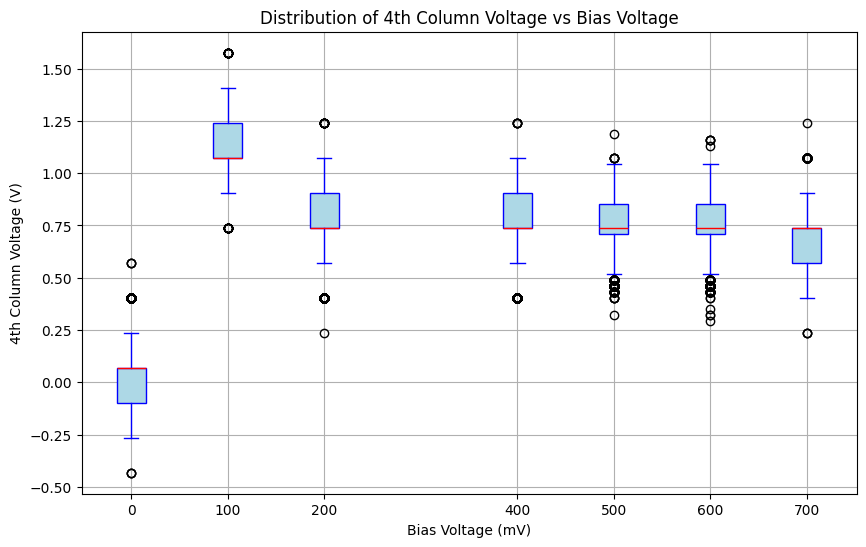

In [57]:
col4_stats = []  # list of arrays, each array = 4th column of a CSV file

for i, file in enumerate(FILES):
    df = pd.read_csv(file)
    
    # Row slicing
    r_start, r_end = ROW_RANGES[i]
    df = df.iloc[r_start:r_end + 1]
    
    # Time filtering
    t_min, t_max = TIME_FILTERS[i]
    if t_min is not None:
        df = df[df['x-axis'] >= t_min]
    if t_max is not None:
        df = df[df['x-axis'] <= t_max]
    
    # Extract 4th column (index 3)
    col4_data = df.iloc[:, 3].values
    col4_stats.append(col4_data)

# =========================
# Plot boxplots
# =========================
plt.figure(figsize=(10, 6))
plt.boxplot(
    col4_stats,
    positions=MV_NUMBERS,
    widths=30,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)

plt.xlabel('Bias Voltage (mV)')
plt.ylabel('4th Column Voltage (V)')
plt.title('Distribution of 4th Column Voltage vs Bias Voltage')
plt.grid(True)
plt.show()

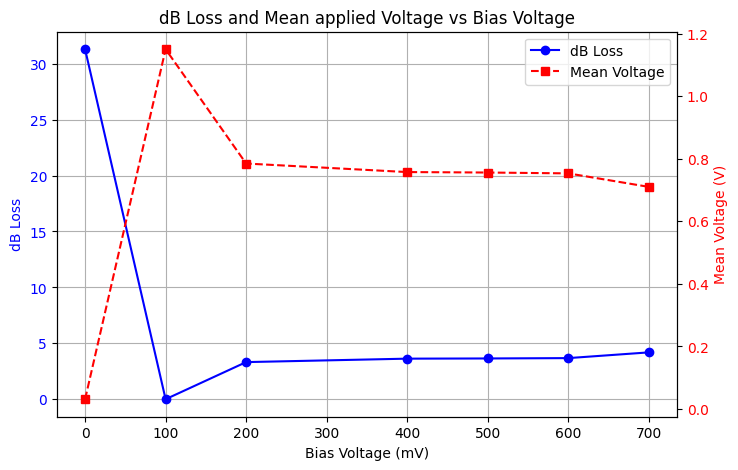

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Example data
# =========================
results_matrix = np.array([
    [0, 0.0313179527],
    [100, 1.15020499],
    [200, 0.784883744],
    [400, 0.757505237],
    [500, 0.756008699],
    [600, 0.753274728],
    [700, 0.710163152]
])

# Example 4th-column mean voltage per bias (for right Y-axis)
col4_mean = np.array([0.0313, 1.1502, 0.7848, 0.7575, 0.7560, 0.7533, 0.7102])

# =========================
# Extract columns
# =========================
mv_numbers = results_matrix[:, 0]      # Bias voltages
max_min_values = results_matrix[:, 1]  # Max-Min per bias

# Sort by bias voltage
order = np.argsort(mv_numbers)
mv_numbers = mv_numbers[order]
max_min_values = max_min_values[order]
col4_mean = col4_mean[order]

# Reference value (maximum modulation)
ref_value = np.max(max_min_values)

# Convert to dB loss
dB_loss = -20 * np.log10(max_min_values / ref_value)

# =========================
# Dual Y-axis plot
# =========================
fig, ax1 = plt.subplots(figsize=(8,5))

# Left Y-axis: dB loss
ax1.plot(mv_numbers, dB_loss, marker='o', linestyle='-', color='b', label='dB Loss')
ax1.set_xlabel('Bias Voltage (mV)')
ax1.set_ylabel('dB Loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Right Y-axis: mean voltage
ax2 = ax1.twinx()
ax2.plot(mv_numbers, col4_mean, marker='s', linestyle='--', color='r', label='Mean Voltage')
ax2.set_ylabel('Mean Voltage (V)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('dB Loss and Mean applied Voltage vs Bias Voltage')
plt.show()


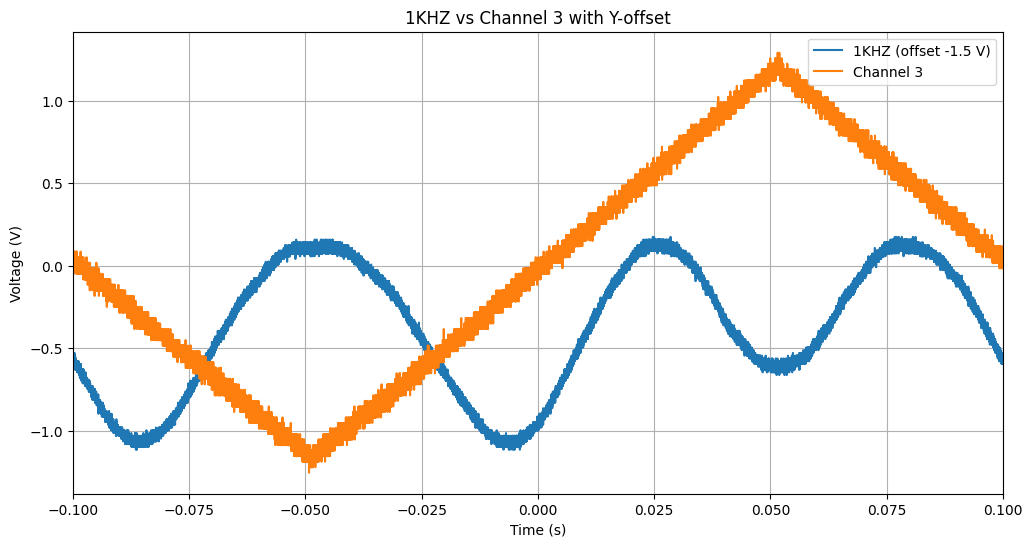

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('sampleramp.csv')

# Extract columns
time = df['x-axis']
signal_1khz = df['1KHZ'] - 1.5  # apply offset directly
signal_3 = df['3']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time, signal_1khz, label='1KHZ (offset -1.5 V)')
plt.plot(time, signal_3, label='Channel 3')

# Formatting
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('1KHZ vs Channel 3 with Y-offset')
plt.legend()
plt.grid(True)
plt.xlim(-0.1, 0.1)
plt.show()
